<a href="https://colab.research.google.com/github/Sachin-0231/THE-spark-foundation/blob/main/Task4_SparksFoundationIntern_(EDA_Terrorism).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task 4 : Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

- As a security/defense analyst, try to find out the hot zone of terrorism.
- What all security issues and insights you can derive by EDA?



In [29]:
#importing useful libraries
import numpy as np
import pandas as pd
import seaborn as sns;
sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
terr_df = pd.read_csv('/globalterrorismdb_0718dist.csv',  encoding ='ISO-8859-1', low_memory=False)

In [8]:
terr_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34470,198805170003,1988,5,17,NaN,0,NaN,98,Italy,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
34471,198805170004,1988,5,17,NaN,0,NaN,98,Italy,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
34472,198805170005,1988,5,17,NaN,0,NaN,106,Kuwait,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
34473,198805170006,1988,5,17,NaN,0,NaN,139,Namibia,11,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN


## Understanding the Data

In [9]:
terr_df.shape

(34475, 135)

In [10]:
terr_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
terr_df.dtypes

eventid         int64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG       float64
INT_IDEO      float64
INT_MISC      float64
INT_ANY       float64
related        object
Length: 135, dtype: object

In [12]:
terr_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,3.447500e+04,34475.000000,34475.000000,34475.000000,34475.000000,34475.000000,34475.000000,32592.000000,3.259200e+04,34475.000000,...,5.210000e+02,1.0,1.140000e+02,2.0,920.000000,701.000000,34474.000000,34474.000000,34474.000000,34474.000000
mean,1.981708e+11,1981.644525,6.233648,15.228978,0.016737,156.987440,5.111356,18.521995,-2.675146e+03,1.400464,...,3.387307e+06,20000.0,1.088357e+06,0.0,2.944565,9.810271,-3.165342,-3.121715,0.163486,-2.378749
std,4.383762e+08,4.386154,3.394320,8.849860,0.128285,145.392958,3.185526,25.504563,4.773979e+05,1.091737,...,4.420520e+07,NaN,4.294602e+06,0.0,1.356150,34.972719,4.381608,4.437492,0.785581,4.322741
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.979061e+11,1979.000000,3.000000,8.000000,0.000000,61.000000,2.000000,5.252105,-7.851209e+01,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.982102e+11,1982.000000,6.000000,15.000000,0.000000,110.000000,3.000000,14.622869,-6.606113e+01,1.000000,...,0.000000e+00,20000.0,3.150000e+04,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.985080e+11,1985.000000,9.000000,23.000000,0.000000,185.000000,8.000000,40.917977,1.050799e+01,1.000000,...,4.350000e+05,20000.0,5.000000e+05,0.0,4.000000,2.000000,0.000000,0.000000,0.000000,1.000000
max,1.988052e+11,1988.000000,12.000000,31.000000,1.000000,605.000000,12.000000,64.837778,1.784419e+02,5.000000,...,1.000000e+09,20000.0,4.100000e+07,0.0,7.000000,390.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
terr_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                          'region_txt':'Region','attacktype1_txt':'Attack_Type','target1':'Target','nkill':'Killed',
                          'nwound':'Wounded','gname':'Group','targtype1_txt':'Target_Type',
                          'weaptype1_txt':'Weapon_type','latitude':'Latitude',
                          'longitude':'Longitude','target1':'Target','city':'City'},inplace=True)

In [14]:
# percentage of missing values in our dataset
missing_values = (((terr_df.isnull().sum()).sum())/terr_df.size)*100
missing_values

62.02261434748745

More than 50% values are Null, we need to clean the Dataset first

In [15]:
# creating dataframe with necessary columns only
terr_df = terr_df[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude','Attack_Type','Killed',
              'Wounded','Group','Target','Target_Type','Weapon_type']]
terr_df.head(10)

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack_Type,Killed,Wounded,Group,Target,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


In [16]:
for i in terr_df.columns:
    print(i,terr_df[i].nunique())

Year 19
Month 13
Day 32
Country 140
State 953
Region 11
City 6343
Latitude 5871
Longitude 5906
Attack_Type 9
Killed 114
Wounded 111
Group 1312
Target 21200
Target_Type 22
Weapon_type 12


In [17]:
terr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34475 entries, 0 to 34474
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         34475 non-null  int64  
 1   Month        34475 non-null  int64  
 2   Day          34475 non-null  int64  
 3   Country      34475 non-null  object 
 4   State        34344 non-null  object 
 5   Region       34475 non-null  object 
 6   City         34475 non-null  object 
 7   Latitude     32592 non-null  float64
 8   Longitude    32592 non-null  float64
 9   Attack_Type  34475 non-null  object 
 10  Killed       28849 non-null  float64
 11  Wounded      27041 non-null  float64
 12  Group        34475 non-null  object 
 13  Target       34103 non-null  object 
 14  Target_Type  34475 non-null  object 
 15  Weapon_type  34474 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 4.2+ MB


As we can see, 'Wounded' and 'Killed' Attributes have lots of Null values, need to fill null values

In [18]:
terr_df['Wounded'] = terr_df['Wounded'].fillna(0).astype(int)
terr_df['Killed'] = terr_df['Killed'].fillna(0).astype(int)

In [19]:
terr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34475 entries, 0 to 34474
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         34475 non-null  int64  
 1   Month        34475 non-null  int64  
 2   Day          34475 non-null  int64  
 3   Country      34475 non-null  object 
 4   State        34344 non-null  object 
 5   Region       34475 non-null  object 
 6   City         34475 non-null  object 
 7   Latitude     32592 non-null  float64
 8   Longitude    32592 non-null  float64
 9   Attack_Type  34475 non-null  object 
 10  Killed       34475 non-null  int64  
 11  Wounded      34475 non-null  int64  
 12  Group        34475 non-null  object 
 13  Target       34103 non-null  object 
 14  Target_Type  34475 non-null  object 
 15  Weapon_type  34474 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory usage: 4.2+ MB


**Cleaned Data**

In [20]:
terr_df.head(10)

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack_Type,Killed,Wounded,Group,Target,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0,0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0,0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0,0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0,0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0,0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


# Univariate Analysis

In [21]:
terr_df['Attack_Type'].value_counts()

Bombing/Explosion                      15606
Armed Assault                           7450
Assassination                           5699
Facility/Infrastructure Attack          2311
Hostage Taking (Kidnapping)             1486
Unknown                                 1237
Hostage Taking (Barricade Incident)      474
Hijacking                                155
Unarmed Assault                           57
Name: Attack_Type, dtype: int64

In [22]:
(terr_df['Attack_Type'].value_counts()/terr_df.shape[0])*100

Bombing/Explosion                      45.267585
Armed Assault                          21.609862
Assassination                          16.530819
Facility/Infrastructure Attack          6.703408
Hostage Taking (Kidnapping)             4.310370
Unknown                                 3.588107
Hostage Taking (Barricade Incident)     1.374909
Hijacking                               0.449601
Unarmed Assault                         0.165337
Name: Attack_Type, dtype: float64

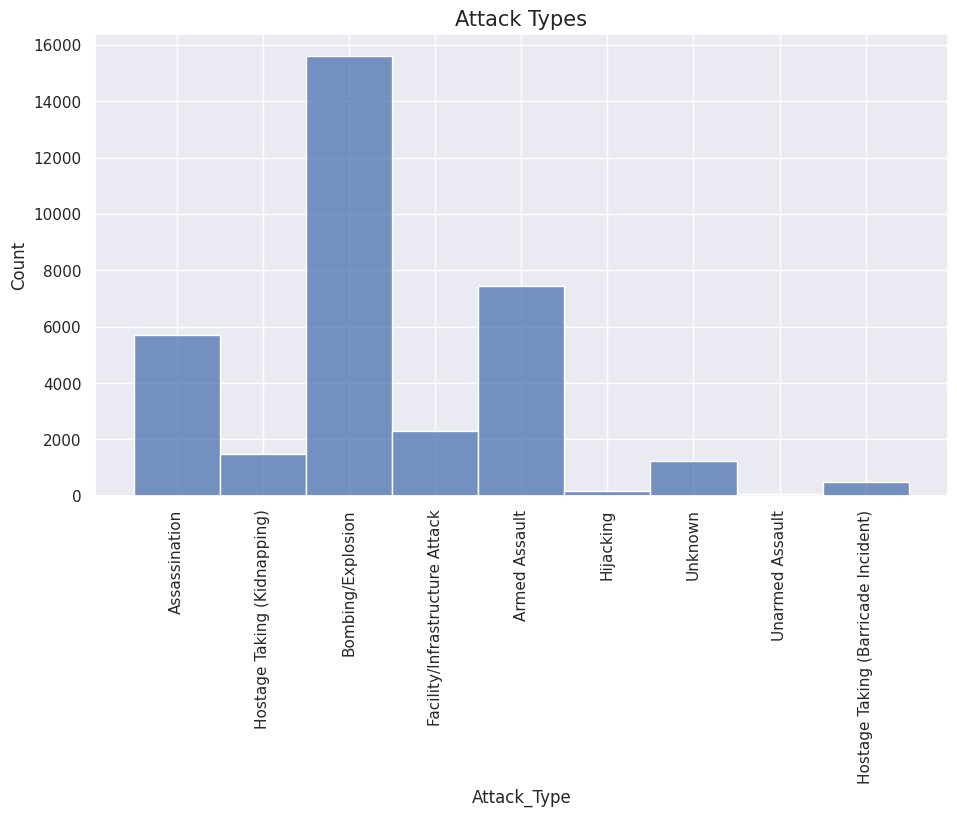

In [23]:
# 10 most attacked targets

plt.figure(figsize = (11,6))
sns.histplot(terr_df['Attack_Type'], palette='cubehelix')
plt.title('Attack Types',fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Conclusion** : 50% of the Attack happened with Bombing/Explosion
- 10-20% of the Attack happened with Armed Assault and Assassination rest are in between 0-6%

## Terrorist Targets: The Ten Countries Which Suffer Most From Terrorism

In [24]:
terr_df.Country.value_counts()[:10]

El Salvador       3980
Peru              3381
United Kingdom    2656
Colombia          2646
Spain             1997
United States     1932
Nicaragua         1732
Chile             1550
Guatemala         1510
France            1294
Name: Country, dtype: int64

Text(0, 0.5, 'Count')

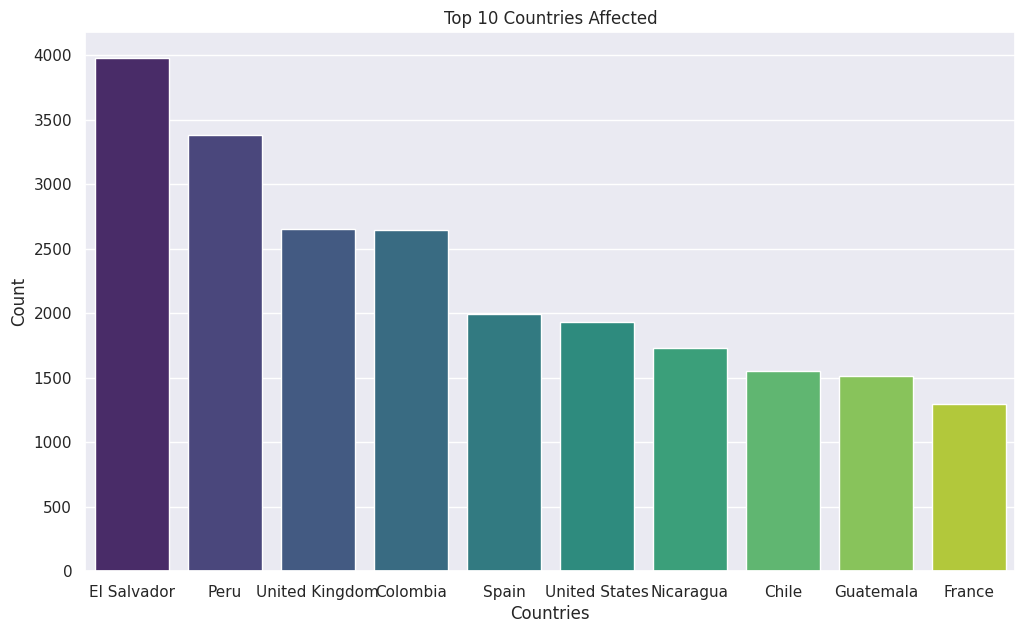

In [36]:
plt.figure(figsize=(12, 7))
sns.barplot(x=terr_df['Country'].value_counts()[:10].index, y=terr_df['Country'].value_counts()[:10].values, palette='viridis')
plt.title('Top 10 Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')

According to research, Iraq is the most affected country by terrorism, then comes Pakistan and Afganistan.

In [26]:
(terr_df['Target_Type'].value_counts().head(10)/terr_df['Target_Type'].shape[0])*100

Business                       18.407542
Private Citizens & Property    16.174039
Military                       15.939086
Government (General)           12.179840
Police                         10.163887
Utilities                       5.949239
Transportation                  4.617839
Government (Diplomatic)         4.116026
Journalists & Media             2.494561
Educational Institution         2.120377
Name: Target_Type, dtype: float64

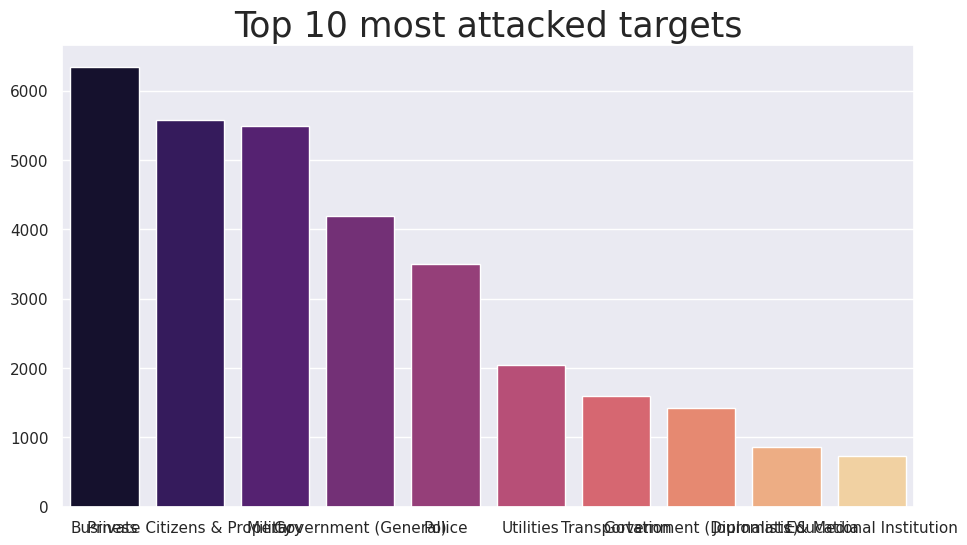

In [38]:
# 10 most attacked targets
plt.figure(figsize=(11, 6))
sns.barplot(x=terr_df['Target_Type'].value_counts().head(10).index,
            y=terr_df['Target_Type'].value_counts().head(10).values, palette='magma')
plt.title('Top 10 most attacked targets', fontsize=25)
plt.show()

**This Graph demonstrates:**
- The most Attacked Target is 'Private Citizens & Property' which is approximately 25%
- 10-20% is the Target which is 'Military','Police', 'Government', 'Business'   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'South America'),
  Text(1, 0, 'Western Europe'),
  Text(2, 0, 'Central America & Caribbean'),
  Text(3, 0, 'Middle East & North Africa'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South Asia'),
  Text(6, 0, 'Sub-Saharan Africa'),
  Text(7, 0, 'Southeast Asia'),
  Text(8, 0, 'East Asia'),
  Text(9, 0, 'Australasia & Oceania'),
  Text(10, 0, 'Eastern Europe')])

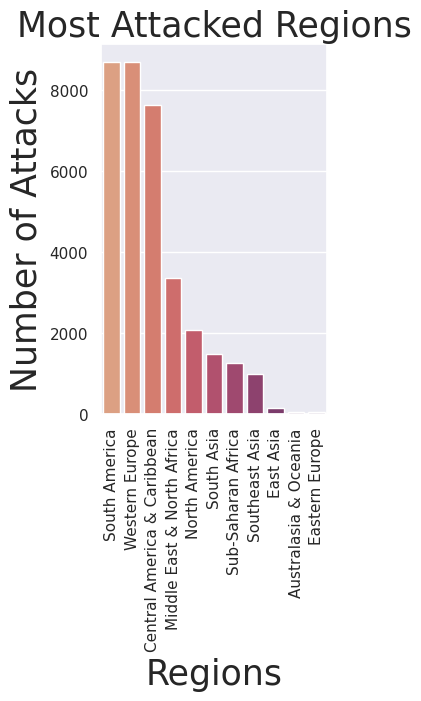

In [41]:
# plt.figure(figsize=(15, 5))

# # Subplot 1
# plt.subplot(1, 2, 1)
# sns.barplot(terr_df['Region'].value_counts().index, terr_df['Region'].value_counts().values, palette='flare')
# plt.title('Most Attacked Regions', fontsize=25)
# plt.xlabel('Regions', fontsize=25)
# plt.ylabel('Number of Attacks', fontsize=25)
# plt.xticks(rotation=90)

# # Subplot 2
# plt.subplot(1, 2, 2)
# sns.barplot(terr_df['State'].value_counts().head(15).index, terr_df['State'].value_counts().head(15).values, palette='viridis')
# plt.title('Top 10 Most Attacked States', fontsize=25)
# plt.xlabel('States', fontsize=25)
# plt.ylabel('Number of Attacks', fontsize=25)
# plt.xticks(rotation=90)

# plt.show()


# Subplot 1
plt.subplot(1, 2, 1)
region_counts = terr_df['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette='flare')
plt.title('Most Attacked Regions', fontsize=25)
plt.xlabel('Regions', fontsize=25)
plt.ylabel('Number of Attacks', fontsize=25)
plt.xticks(rotation=90)


**With these Graphs, we can conclude that :**
- Most Attacked Region is 'Middle East and North Africa' then comes South Asia
- Most Attacked States is 'Baghdad'

In [43]:
(terr_df['Weapon_type'].value_counts().head()/terr_df['Weapon_type'].shape[0])*100

Explosives    44.977520
Firearms      35.364757
Unknown       11.022480
Incendiary     7.759246
Melee          0.591733
Name: Weapon_type, dtype: float64

Text(0, 0.5, 'Number of Weapons Used')

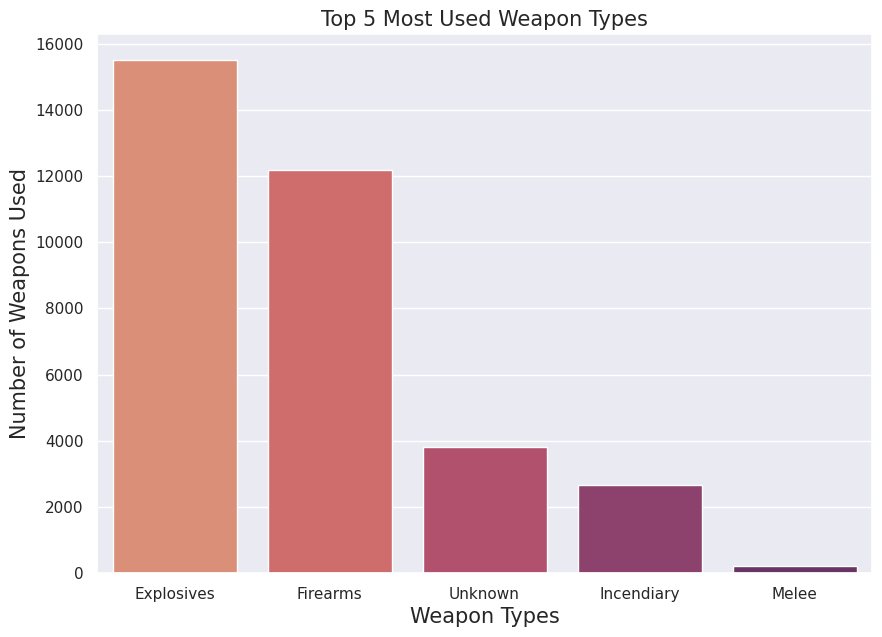

In [45]:
# Top 5 most used weapons types in terror attacks
# plt.figure(figsize=(10,7))
# sns.barplot(terr_df['Weapon_type'].value_counts().head().index, terr_df['Weapon_type'].value_counts().head().values,palette='flare')
# plt.title('Top 5 Most Used Weapon types',fontsize=15)
# plt.xlabel('Weapon Types',fontsize=15)
# plt.ylabel('Number of Weapon Used',fontsize=15)

# Top 5 most used weapons types in terror attacks
plt.figure(figsize=(10, 7))
weapon_type_counts = terr_df['Weapon_type'].value_counts().head()
sns.barplot(x=weapon_type_counts.index, y=weapon_type_counts.values, palette='flare')
plt.title('Top 5 Most Used Weapon Types', fontsize=15)
plt.xlabel('Weapon Types', fontsize=15)
plt.ylabel('Number of Weapons Used', fontsize=15)


- Almost 50% of Weapon used is 'Explosives' whereas 32% 'Firearms' used in the terrorism

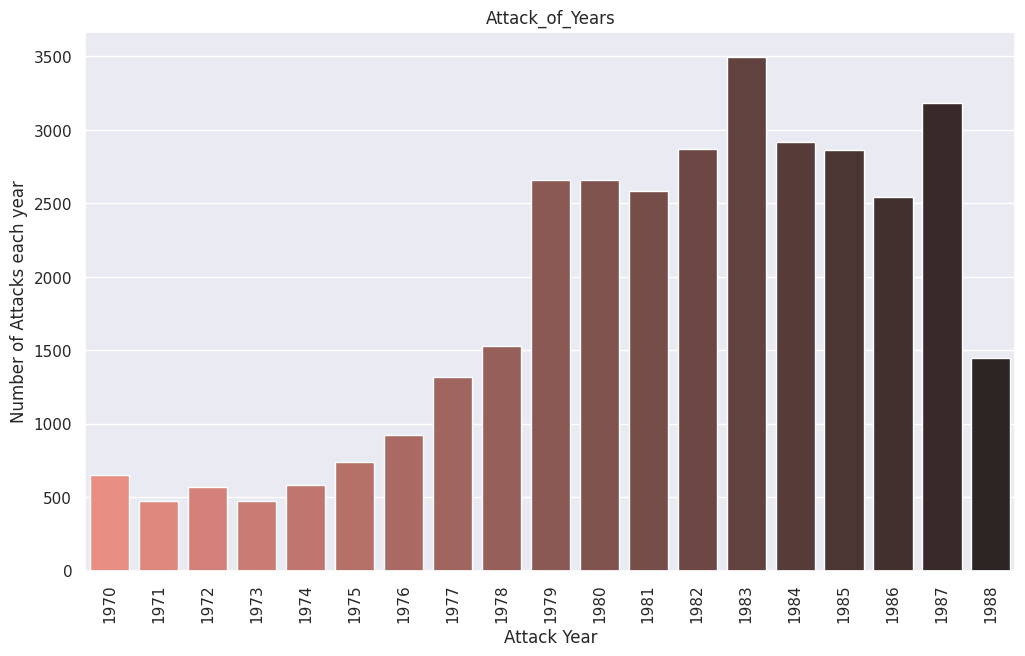

In [46]:
x_year = terr_df['Year'].unique()
y_count_years = terr_df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (12,7))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'dark:salmon_r')
plt.xticks(rotation = 90)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

**This graphs shows**
- 2014 appears to be witness of a huge terrorist attacks
- 2014 onwards recorded a large increase in attacks of terrorism.

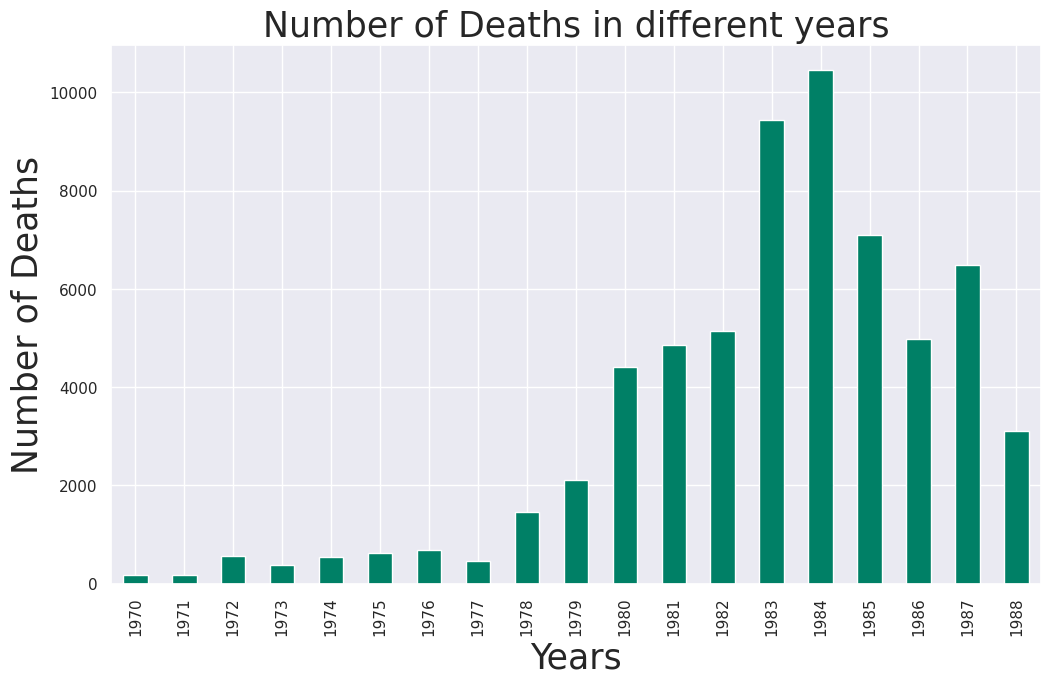

In [47]:
plt.figure(figsize = (12,7))
terr_df.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='summer')
plt.title('Number of Deaths in different years',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Deaths',fontsize=25)
plt.xticks(rotation=90)
plt.show()

Number of deaths caused by terrorism is more between 2014 and 2018, with on an average >50K people being killed.
High peak went to 2014 with 45K+ deaths.

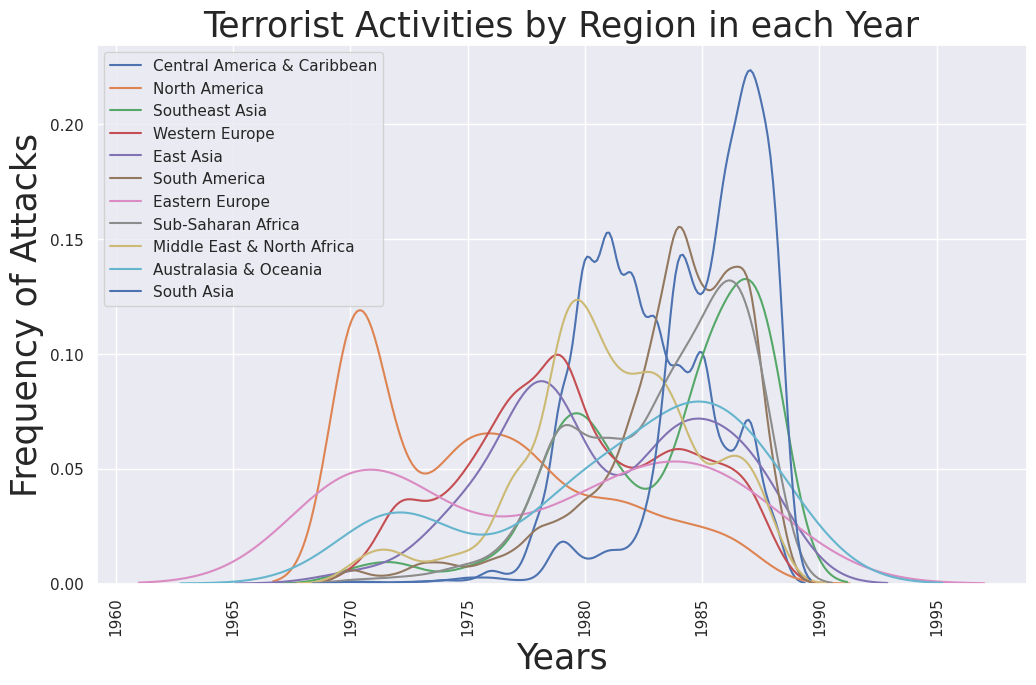

In [49]:
# plt.figure(figsize = (12,7))
# sns.kdeplot(terr_df['Year'], hue = terr_df['Region'])
# plt.title('Terrorist Activities by Region in each Year',fontsize=25)
# plt.xlabel('Years',fontsize=25)
# plt.ylabel('Frequency of Attacks',fontsize=25)
# plt.xticks(rotation=90)
# plt.show()

plt.figure(figsize=(12, 7))
# Loop through each region and create a KDE plot
for region in terr_df['Region'].unique():
    sns.kdeplot(terr_df[terr_df['Region'] == region]['Year'], label=region)

plt.title('Terrorist Activities by Region in each Year', fontsize=25)
plt.xlabel('Years', fontsize=25)
plt.ylabel('Frequency of Attacks', fontsize=25)
plt.xticks(rotation=90)
plt.legend()  # Add a legend to distinguish regions
plt.show()


## Bivariate Analysis

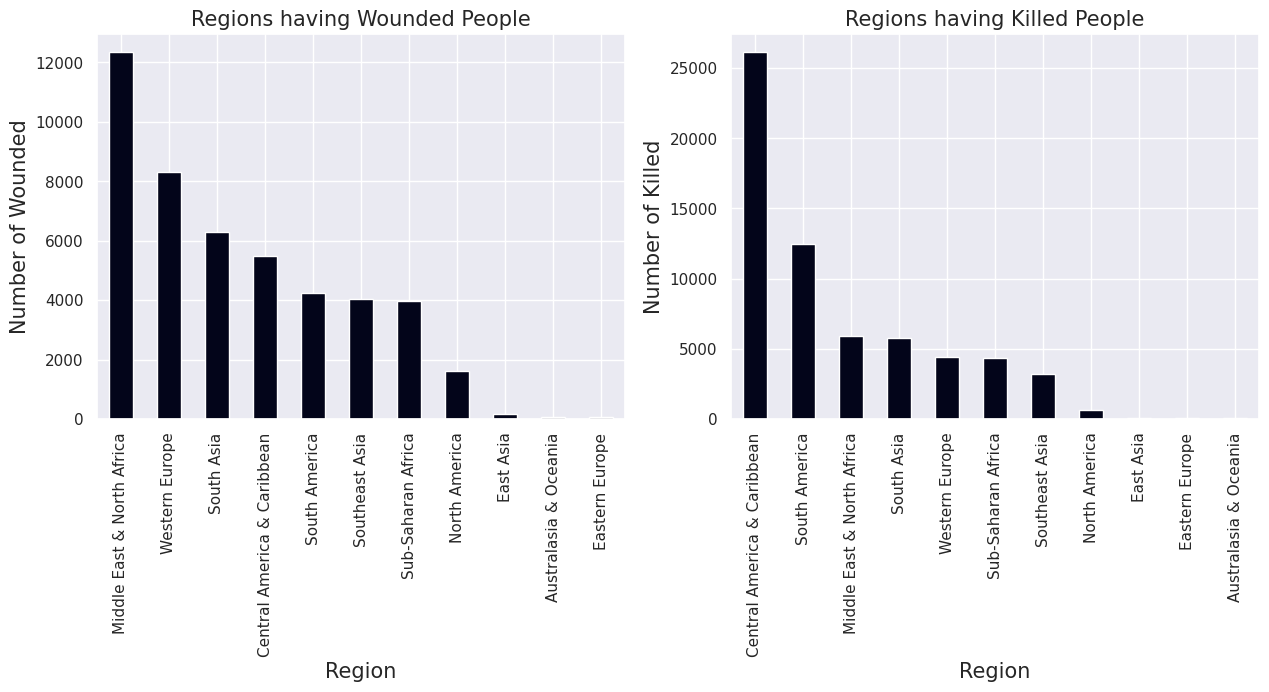

In [50]:
plt.subplot(1,2,1)

terr_df.groupby(['Region'])['Wounded'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Wounded People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
terr_df.groupby(['Region'])['Killed'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Killed People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

'Middle East & North Africa' has the most Killed people (>1.4 Lacs) and wounded people (>2 lacs)

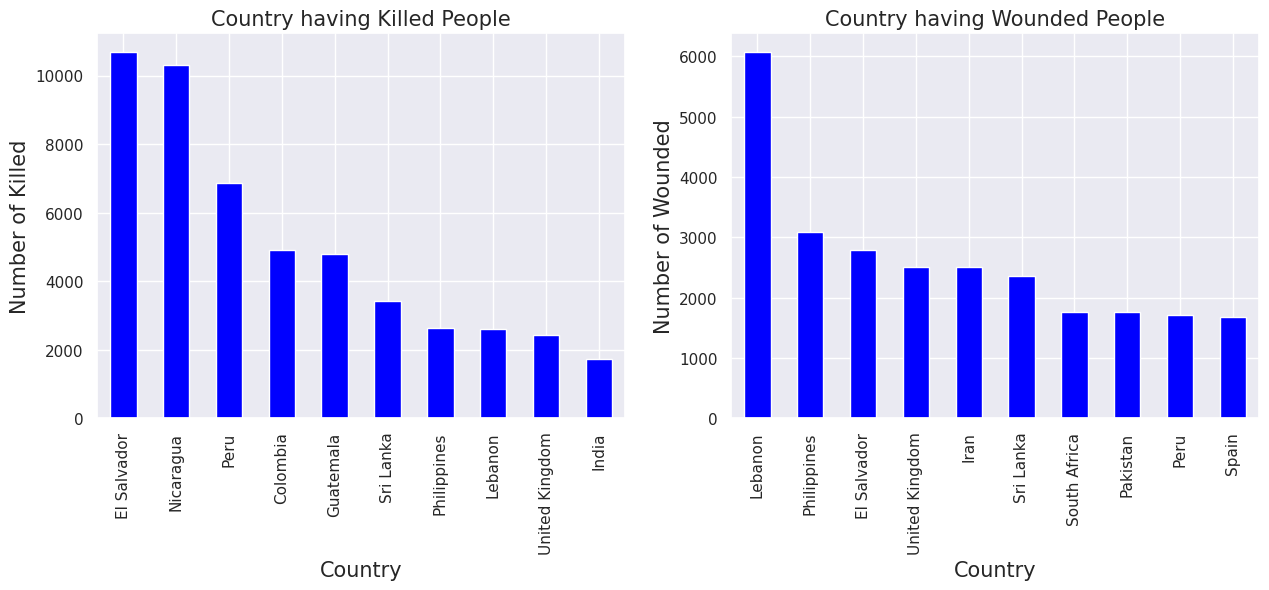

In [51]:
plt.subplot(1,2,2)

df1=terr_df.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='winter')
plt.title('Country having Wounded People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,1)
terr_df.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='winter')
plt.title('Country having Killed People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

'Iraq' has the most Killed people (>70K) and wounded people (>1.2 lacs)
Afganistan, pakistan and India all saw peak deaths while Iraq, which has overtaken all of these at the top of the table, suffered 37,700 more fatalities.

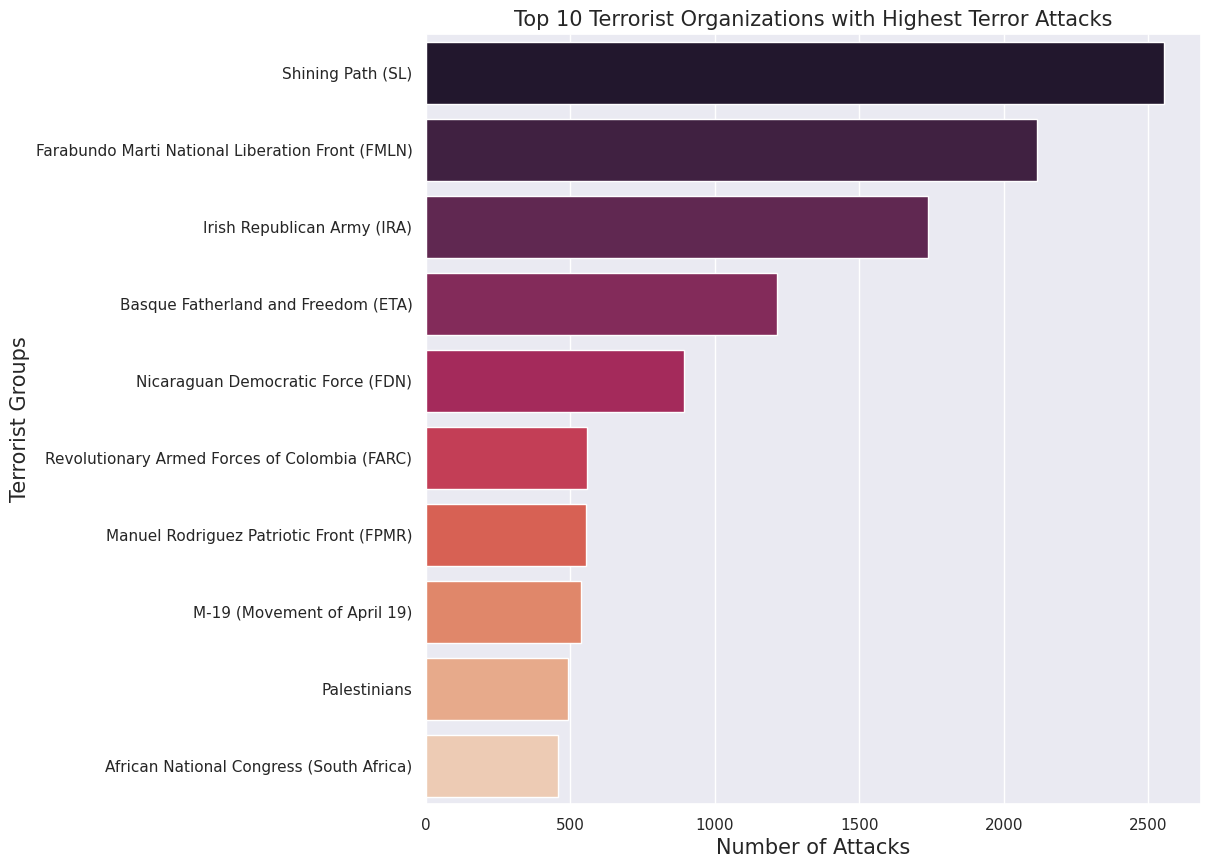

In [53]:
# plt.figure(figsize=(10,10))
# sns.barplot(terr_df['Group'].value_counts()[1:11].values, terr_df['Group'].value_counts()[1:11].index,palette='rocket')
# plt.title('Top 10 Terrorist Organization with Highest Terror Attacks',fontsize=15)
# plt.xlabel('Number of Attacks',fontsize=15)
# plt.ylabel('Terrorist Groups',fontsize=15)
# plt.show()


plt.figure(figsize=(10, 10))
group_counts = terr_df['Group'].value_counts()[1:11]
sns.barplot(x=group_counts.values, y=group_counts.index, palette='rocket')
plt.title('Top 10 Terrorist Organizations with Highest Terror Attacks', fontsize=15)
plt.xlabel('Number of Attacks', fontsize=15)
plt.ylabel('Terrorist Groups', fontsize=15)
plt.show()


In [71]:
terr_df_tal = terr_df[terr_df.Group == 'Taliban']

In [73]:

print(terr_df_tal[pd.isna(terr_df_tal['Killed'])])


Empty DataFrame
Columns: [Year, Month, Day, Country, State, Region, City, Latitude, Longitude, Attack_Type, Killed, Wounded, Group, Target, Target_Type, Weapon_type]
Index: []


In [74]:
terr_df_tal.dropna(subset=['Killed'], inplace=True)


In [80]:
# Terror Attacks by Taliban over the Years
plt.figure(figsize = (13,7))
sns.barplot(x=terr_df_tal['Year'].value_counts().index,y=terr_df_tal['Year'].value_counts().values, palette = 'viridis')
plt.title('Terror Attack over the years by Taliban',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation= 90)



# plt.figure(figsize=(13, 7))
# year_counts = terr_df_tal['Year'].value_counts()
# sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
# plt.title('Terror Attacks over the Years by Taliban', fontsize=15)
# plt.xlabel('Years', fontsize=15)
# plt.ylabel('Number of Attacks', fontsize=15)
# plt.xticks(rotation=90)

ValueError: ignored

<Figure size 1300x700 with 0 Axes>

IndexError: ignored

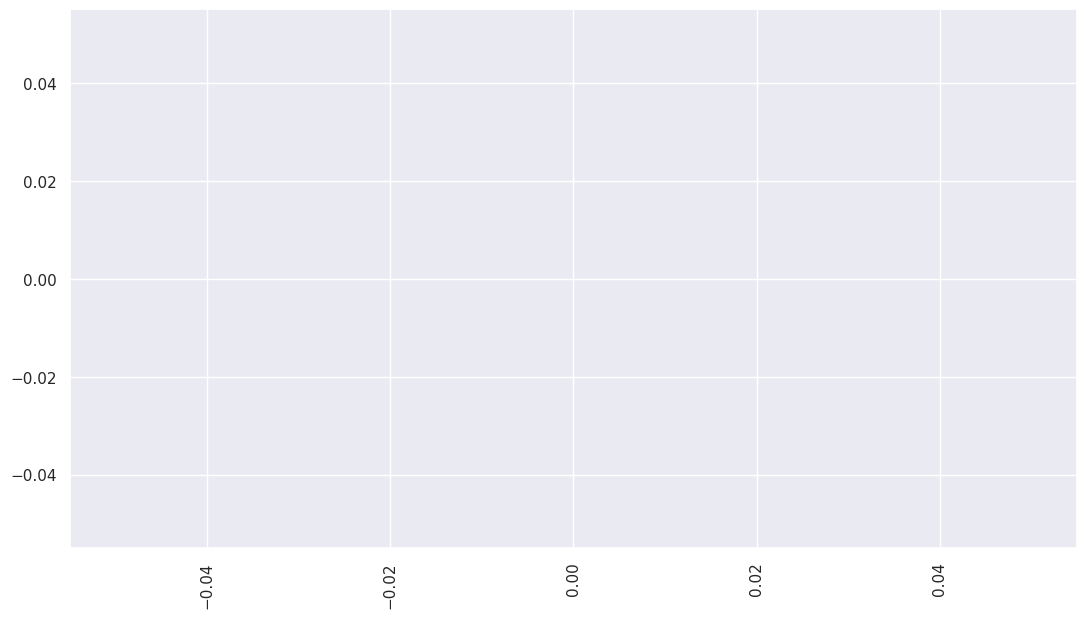

In [67]:
grouped_data = terr_df_tal.groupby(['Year'])['Killed'].sum()
plt.figure(figsize=(13,7))
terr_df_tal.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='RdBu')
plt.title('People Killed by Taliban over the Years',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of people killed',fontsize=15)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Taliban killed more than 5000 people during 2015 after that a decreasing trend could be seen but still the numbers are very high.

In [68]:
# creating new dataframe for the year 2014
terr_df_2014 = terr_df[terr_df.Year == 2014]

ValueError: ignored

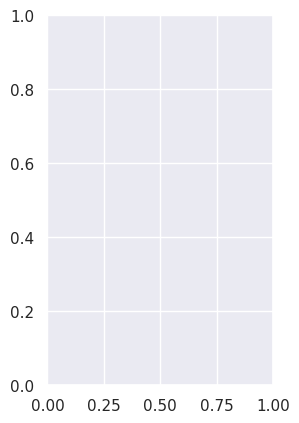

In [78]:
# Regions that were attacked most in 2014
plt.subplot(1, 2, 1)
sns.barplot(x=terr_df_2014['Region'].value_counts().index, y=terr_df_2014['Region'].value_counts().values, palette='magma')
plt.title('Most Attacked Region in 2014', fontsize=15)
plt.xlabel('Regions', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.xticks(rotation=90)

# top 10 countries that were attacked most in 2014
plt.subplot(1, 2, 2)
sns.barplot(x=terr_df_2014['Country'].value_counts().head(10).index, y=terr_df_2014['Country'].value_counts().head(10).values, palette='magma')
plt.title('Top 10 Most Attacked Country in 2014', fontsize=15)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)


**With these Graphs, we can conclude that :**
- In 2014, Most Attacked Region 'Middle East and North Africa' then comes South Asia
- In 2014, Most Attacked Country is 'Iraq'

NameError: ignored

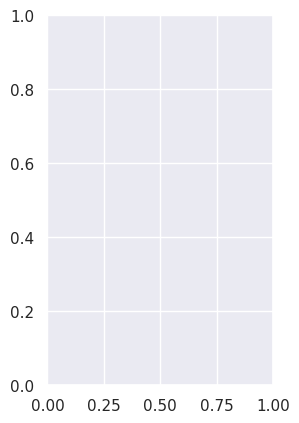

In [58]:
plt.subplot(1,2,1)
terr_df_2014.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='RdBu')
plt.title('Top 10 countries with max people killed in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people killed ',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
terr_df_2014.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='spring')
plt.title('Top 10 countries with max people wounded in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people Wounded',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

## Conclusion
**After performing the Exploratory Data Analysis we get the following insights from the data:**

- Private Citizens and Property were attacked most followed by Military, Police, Government and so on.
- Middle East & North Africa was most affected among the top affected region. Most of the people in this region were either wounded or killed.
- Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.
- The State and City that was most affected was Baghdad
- In the last decade 2014 had most number of terror attacks. That was around 16500 attacks during this year which means on average 45 attacks per day.
- The most common attack type was Bombing/Explosion.
- Explosives have been consistently the most popular weapon of choice for terrorists.
- Taliban became more active since 2012 and they are responsible for the most of the terror attacks

**Recommendation**
- Since Private Citizens and Property are being targeted consistently so stronger security and surveillance should be provided, especially in the dense populated regions.
- More surveillance is required especially in the Middle East & North African Regions.
- Strict border policy should be implemented to prevent the movement of explosives between the regions.